https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/practice-problems/machine-learning/predict-the-employee-burn-out-rate-7-6340b4e3/

In [14]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train  = pd.read_csv(r"./train.csv")
test = pd.read_csv(r"./test.csv")

In [16]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


### Limpiamos el dataset 

In [17]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [18]:
train['Date of Joining']= pd.to_datetime(train['Date of Joining'])
train['year'] = train['Date of Joining'].dt.year
train['month'] =  train['Date of Joining'].dt.month
train["day"] = train['Date of Joining'].dt.day

In [19]:
train['Gender']=pd.Categorical(train['Gender'])
d1 = dict(enumerate(train['Gender'].cat.categories))
train['Gender']=train.Gender.cat.codes

In [20]:
train['Company Type']=pd.Categorical(train['Company Type'])
d1 = dict(enumerate(train['Company Type'].cat.categories))
train['Company Type']=train['Company Type'].cat.codes

train['WFH Setup Available']=pd.Categorical(train['WFH Setup Available'])
d1 = dict(enumerate(train['WFH Setup Available'].cat.categories))
train['WFH Setup Available']=train['WFH Setup Available'].cat.codes

In [21]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16,2008,9,30
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36,2008,11,30
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,NaN,5.8,0.49,2008,3,10
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20,2008,11,3
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52,2008,7,24


In [24]:
train['Resource Allocation'].fillna(train['Resource Allocation'].mean(),inplace=True)
train['Mental Fatigue Score'].fillna(train['Mental Fatigue Score'].mean(),inplace=True)
#data['Maximum_price'].fillna(data['Maximum_price'].mean(),inplace=True)
train = train.dropna()

### Matriz de Correlacion

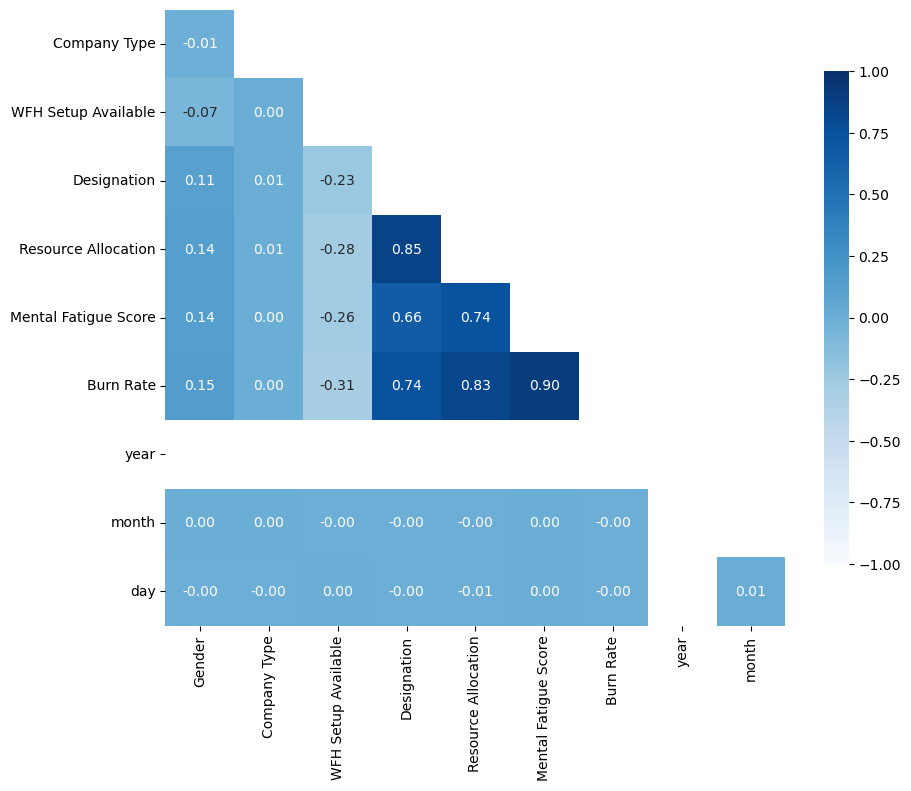

In [26]:
data_corr=train.corr()
np.ones_like(data_corr, dtype=bool)
mask = np.triu(np.ones_like(data_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(data_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [36]:
test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [49]:
test['Gender']=pd.Categorical(test['Gender'])
d1 = dict(enumerate(test['Gender'].cat.categories))
test['Gender']=test.Gender.cat.codes

employee=test['Employee ID']

In [30]:
from sklearn import linear_model

In [44]:
y = train['Burn Rate']
X = train[['Gender','Designation','Resource Allocation', 'Mental Fatigue Score']]

In [45]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.score(X,y)

0.8693162364648909

In [46]:
regr.coef_

array([0.00718738, 0.00842785, 0.03231166, 0.06759411])

In [47]:
X_Test = test[['Gender','Designation','Resource Allocation', 'Mental Fatigue Score']]
prediction = regr.predict(X_Test)
prediction

array([0.59694676, 0.32259868, 0.4094136 , ..., 0.81404195, 0.57727954,
       0.11472539])

In [50]:
data_submission=pd.DataFrame({
    'Employee ID': employee,
    'Burn Rate': prediction
})

In [51]:
data_submission.to_csv("output.csv",index=False)